In [962]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import linregress
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [964]:
df = pd.read_csv('c:\\Users\\Yotam\\Desktop\\word_cup_penalty.csv')

## learning the data

In [966]:
df.shape

(354, 9)

In [968]:
df.head(10)

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination
0,1,FRA,7.0,R,R,1.0,1.0,1,0.0
1,1,GER,9.0,R,C,1.0,1.0,2,0.0
2,1,FRA,6.0,R,L,1.0,1.0,3,0.0
3,1,GER,2.0,R,C,1.0,1.0,4,0.0
4,1,FRA,9.0,R,L,1.0,1.0,5,0.0
5,1,GER,4.0,R,L,1.0,0.0,6,0.0
6,1,FRA,8.0,L,L,1.0,0.0,7,0.0
7,1,GER,3.0,R,R,1.0,1.0,8,0.0
8,1,FRA,9.0,R,L,1.0,1.0,9,0.0
9,1,GER,9.0,R,C,1.0,1.0,10,1.0


In [970]:
df.tail(10)

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination
344,35,FRA,4.0,R,L,1.0,1.0,1,0.0
345,35,ARG,7.0,L,L,1.0,1.0,2,0.0
346,35,FRA,4.0,R,L,1.0,0.0,3,0.0
347,35,ARG,8.0,L,R,1.0,1.0,4,0.0
348,35,FRA,7.0,R,L,0.0,0.0,5,0.0
349,35,ARG,7.0,R,L,1.0,1.0,6,0.0
350,35,FRA,2.0,R,L,1.0,1.0,7,1.0
351,35,ARG,7.0,R,R,1.0,1.0,8,1.0
352,35,FRA,NaN,NaN,NaN,NaN,NaN,9,NaN
353,35,ARG,NaN,NaN,NaN,NaN,NaN,10,NaN


In [972]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Game_id         354 non-null    int64  
 1   Team            354 non-null    object 
 2   Zone            320 non-null    float64
 3   Foot            320 non-null    object 
 4   Keeper          320 non-null    object 
 5   OnTarget        320 non-null    float64
 6   Goal            320 non-null    float64
 7   Penalty_Number  354 non-null    int64  
 8   Elimination     321 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 25.0+ KB


In [974]:
df.isna().sum()

Game_id            0
Team               0
Zone              34
Foot              34
Keeper            34
OnTarget          34
Goal              34
Penalty_Number     0
Elimination       33
dtype: int64

## Drop null

In [976]:
df = df.dropna()

In [980]:
df.shape

(320, 9)

In [982]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 0 to 351
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Game_id         320 non-null    int64  
 1   Team            320 non-null    object 
 2   Zone            320 non-null    float64
 3   Foot            320 non-null    object 
 4   Keeper          320 non-null    object 
 5   OnTarget        320 non-null    float64
 6   Goal            320 non-null    float64
 7   Penalty_Number  320 non-null    int64  
 8   Elimination     320 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 25.0+ KB


In [984]:
df.isna().sum()

Game_id           0
Team              0
Zone              0
Foot              0
Keeper            0
OnTarget          0
Goal              0
Penalty_Number    0
Elimination       0
dtype: int64

In [986]:
df.tail(10)

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination
342,34,NED,7.0,R,R,1.0,1.0,9,1.0
343,34,ARG,1.0,R,R,1.0,1.0,10,1.0
344,35,FRA,4.0,R,L,1.0,1.0,1,0.0
345,35,ARG,7.0,L,L,1.0,1.0,2,0.0
346,35,FRA,4.0,R,L,1.0,0.0,3,0.0
347,35,ARG,8.0,L,R,1.0,1.0,4,0.0
348,35,FRA,7.0,R,L,0.0,0.0,5,0.0
349,35,ARG,7.0,R,L,1.0,1.0,6,0.0
350,35,FRA,2.0,R,L,1.0,1.0,7,1.0
351,35,ARG,7.0,R,R,1.0,1.0,8,1.0


## Basic Descriptive Analysis

In [988]:
# Group by 'Team' and count the number of penalties
penalties_by_team = df.groupby('Team').size().reset_index(name='Penalty_Count')

# Find the team with the most penalties
most_penalties_team = penalties_by_team.sort_values(by='Penalty_Count', ascending=False).iloc[0]

print(f"The team that took the most penalties is: {most_penalties_team['Team']} with {most_penalties_team['Penalty_Count']} penalties.")


The team that took the most penalties is: ARG with 31 penalties.


In [990]:
# Group by 'Team' and count the unique 'Game_id'
games_by_team = df.groupby('Team')['Game_id'].nunique().reset_index(name='Unique_Game_Count')

# Sort by the number of different games in descending order
games_by_team_sorted = games_by_team.sort_values(by='Unique_Game_Count', ascending=False)

# Display the result
print(games_by_team_sorted)


   Team  Unique_Game_Count
0   ARG                  7
2   BRA                  5
25  SPA                  5
10  FRA                  5
9   ENG                  4
20  NED                  4
11  GER                  4
15  ITA                  4
7   CRO                  4
19  MEX                  2
6   CRA                  2
14  IRE                  2
16  JAP                  2
24  RUS                  2
23  ROM                  2
22  POR                  1
29  URU                  1
28  UKR                  1
27  SWZ                  1
26  SWE                  1
3   BUL                  1
8   DEN                  1
21  PAR                  1
4   CHI                  1
18  MAR                  1
17  KOR                  1
1   BEL                  1
13  GRE                  1
12  GHA                  1
5   COL                  1
30  YUG                  1


In [994]:
# Define a function to categorize zones based on the number
def categorize_zone_by_number(zone):
    if zone in [1, 4, 7]:  # Left zones
        return 'Left'
    elif zone in [2, 5, 8]:  # Right zones
        return 'Center'
    elif zone in [3, 6, 9]:  # Center zones
        return 'Right'
    else:
        return 'Unknown'  # In case there are unexpected values

# Apply the function to create a new column 'Kick_Direction'
df['Kick_Direction'] = df['Zone'].apply(categorize_zone_by_number)

# Display the updated DataFrame
print(df[['Zone', 'Kick_Direction']].head())


   Zone Kick_Direction
0   7.0           Left
1   9.0          Right
2   6.0          Right
3   2.0         Center
4   9.0          Right


In [996]:
df.head()

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination,Kick_Direction
0,1,FRA,7.0,R,R,1.0,1.0,1,0.0,Left
1,1,GER,9.0,R,C,1.0,1.0,2,0.0,Right
2,1,FRA,6.0,R,L,1.0,1.0,3,0.0,Right
3,1,GER,2.0,R,C,1.0,1.0,4,0.0,Center
4,1,FRA,9.0,R,L,1.0,1.0,5,0.0,Right


In [998]:
# Calculate the count and percentage of kicks for each direction
kick_direction_percentage = df['Kick_Direction'].value_counts(normalize=True) * 100

# Display the results
print(kick_direction_percentage)


Kick_Direction
Left      47.5
Right     32.5
Center    20.0
Name: proportion, dtype: float64


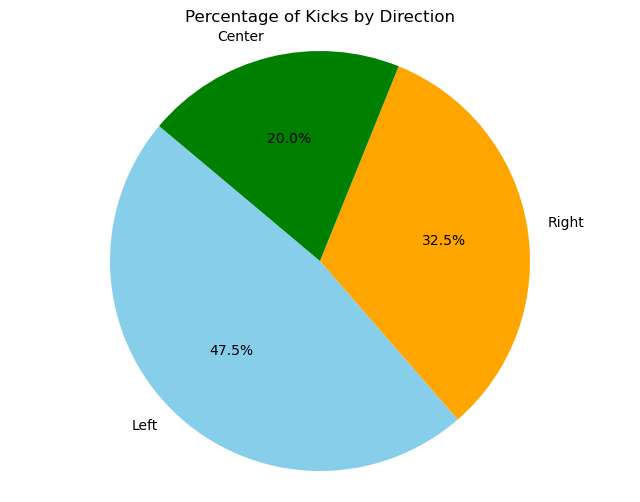

In [1000]:
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(kick_direction_percentage.values, labels=kick_direction_percentage.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'green'], startangle=140)

# Add title
plt.title('Percentage of Kicks by Direction')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [1002]:
kick_direction_counts = df['Kick_Direction'].value_counts()

# Display the results
print(kick_direction_counts)


Kick_Direction
Left      152
Right     104
Center     64
Name: count, dtype: int64


C:\Users\Yotam\AppData\Local\Temp\ipykernel_26268\3607304076.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Kick_Direction', palette='viridis')


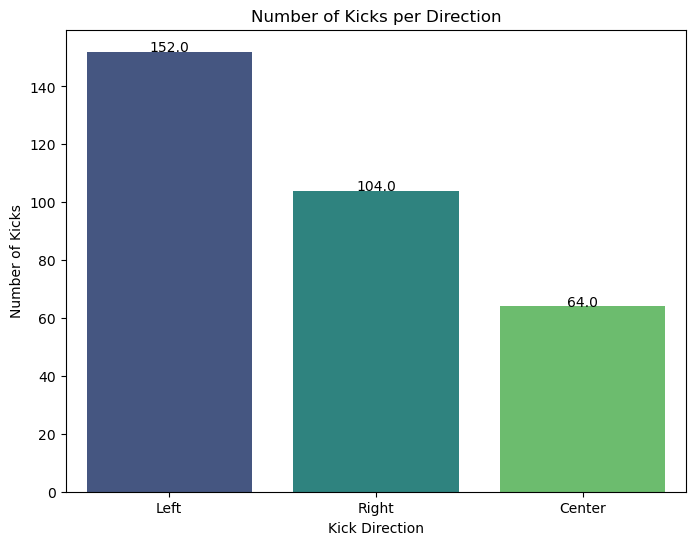

In [1004]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for the 'Kick_Direction' column with different colors
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Kick_Direction', palette='viridis')

# Add title and labels
plt.title('Number of Kicks per Direction')
plt.xlabel('Kick Direction')
plt.ylabel('Number of Kicks')

# Add the count on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 3), 
                textcoords='offset points')

# Display the plot
plt.show()


In [1006]:
# Define a function to categorize zones based on the number
def categorize_ball_height_by_number(zone):
    if zone in [1, 2, 3]:  # Left zones
        return 'Upper'
    elif zone in [4, 5, 6]:  # Right zones
        return 'Middle'
    elif zone in [7, 8, 9]:  # Center zones
        return 'Bottom'
    else:
        return 'Unknown'  # In case there are unexpected values

df['Ball_Height'] = df['Zone'].apply(categorize_ball_height_by_number)

# Display the updated DataFrame
print(df[['Zone', 'Ball_Height']].head())

   Zone Ball_Height
0   7.0      Bottom
1   9.0      Bottom
2   6.0      Middle
3   2.0       Upper
4   9.0      Bottom


In [1008]:
df.head()

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination,Kick_Direction,Ball_Height
0,1,FRA,7.0,R,R,1.0,1.0,1,0.0,Left,Bottom
1,1,GER,9.0,R,C,1.0,1.0,2,0.0,Right,Bottom
2,1,FRA,6.0,R,L,1.0,1.0,3,0.0,Right,Middle
3,1,GER,2.0,R,C,1.0,1.0,4,0.0,Center,Upper
4,1,FRA,9.0,R,L,1.0,1.0,5,0.0,Right,Bottom


In [1010]:
# Calculate the count and percentage of kicks for each direction
Ball_Height_percentage = df['Ball_Height'].value_counts(normalize=True) * 100

# Display the results
print(Ball_Height_percentage)

Ball_Height
Bottom    47.8125
Middle    31.5625
Upper     20.6250
Name: proportion, dtype: float64


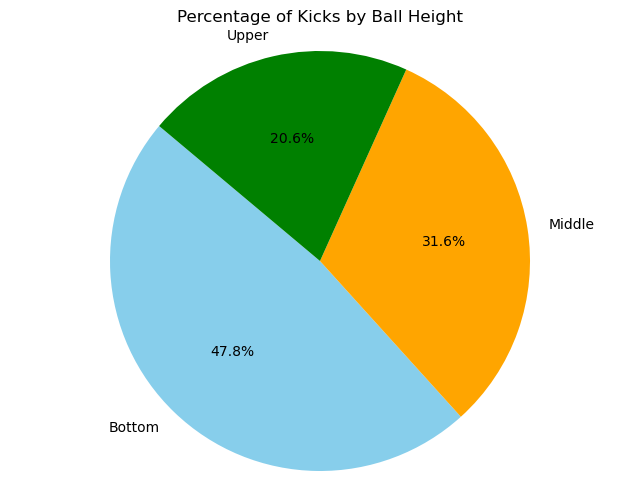

In [1012]:
plt.figure(figsize=(8, 6))
plt.pie(Ball_Height_percentage.values, labels=Ball_Height_percentage.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'green'], startangle=140)

# Add title
plt.title('Percentage of Kicks by Ball Height')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [1014]:
# Calculate the count and percentage of kicks for each direction
kick_direction_percentage = df['Keeper'].value_counts(normalize=True) * 100

# Display the results
print(kick_direction_percentage)

Keeper
L    47.1875
R    40.6250
C    11.5625
l     0.6250
Name: proportion, dtype: float64


In [1018]:
df["Keeper"] = df["Keeper"].replace(["l"], "L")

In [1020]:
# Calculate the count and percentage of kicks for each direction
kick_direction_percentage = df['Keeper'].value_counts(normalize=True) * 100

# Display the results
print(kick_direction_percentage)

Keeper
L    47.8125
R    40.6250
C    11.5625
Name: proportion, dtype: float64


In [1026]:
# Calculate the count and percentage of kicks for each direction
keeper_direction_percentage = df['Keeper'].value_counts(normalize=True) * 100

# Display the results
print(keeper_direction_percentage)

Keeper
L    47.8125
R    40.6250
C    11.5625
Name: proportion, dtype: float64


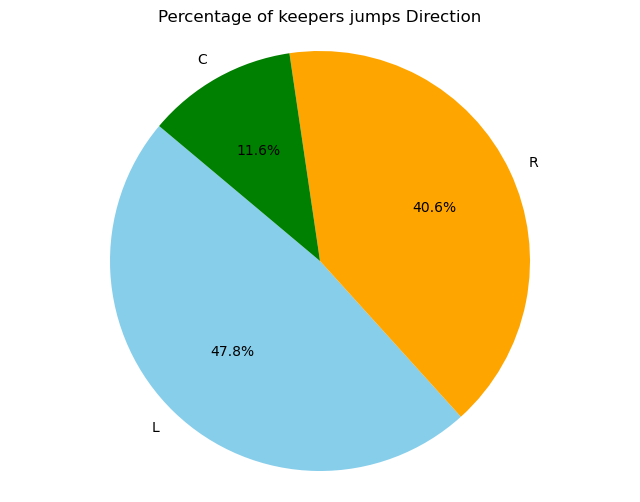

In [1028]:
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(keeper_direction_percentage.values, labels=keeper_direction_percentage.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'green'], startangle=140)

# Add title
plt.title("Percentage of keepers jumps Direction")

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

C:\Users\Yotam\AppData\Local\Temp\ipykernel_26268\3609209627.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Keeper', palette='viridis', order=sorted_keeper_order)


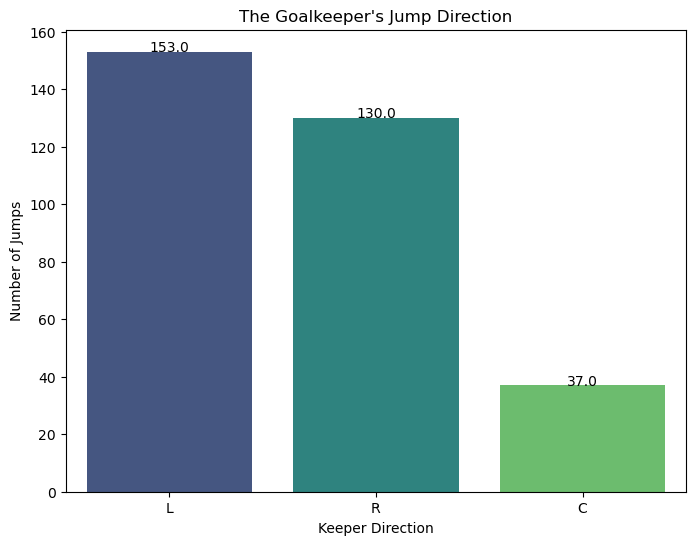

In [1030]:
keeper_counts = df['Keeper'].value_counts()
sorted_keeper_order = keeper_counts.index

# Create a count plot for the 'Keeper' column with different colors and sorted bars
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Keeper', palette='viridis', order=sorted_keeper_order)

# Add title and labels
plt.title("The Goalkeeper's Jump Direction")
plt.xlabel('Keeper Direction')
plt.ylabel('Number of Jumps')

# Add the count on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 3), 
                textcoords='offset points')

# Display the plot
plt.show()


C:\Users\Yotam\AppData\Local\Temp\ipykernel_26268\1531573296.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_labels, y=kicks_per_zone.values, palette="viridis")


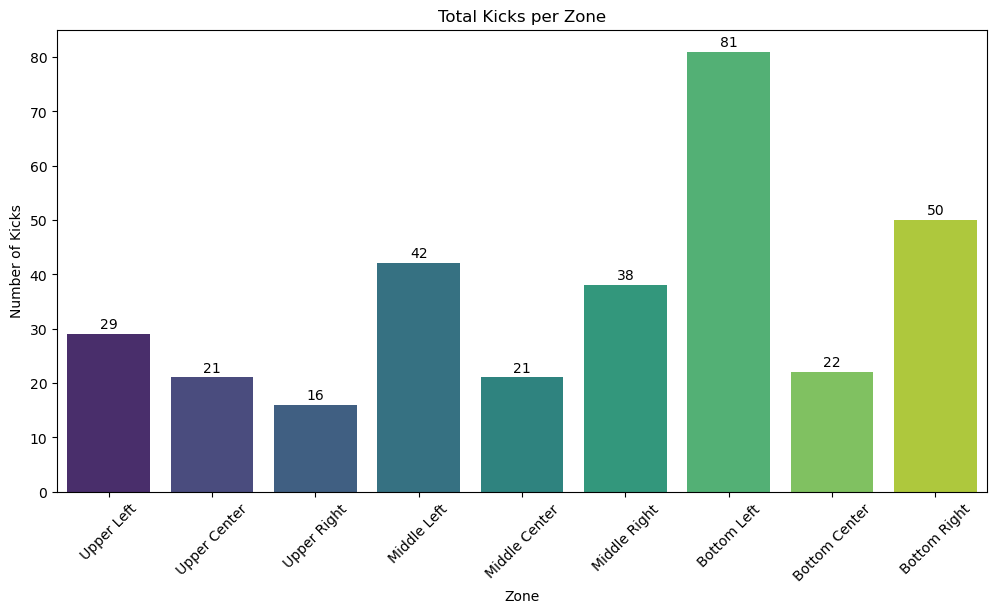

In [1034]:
# Count number of kicks per zone
kicks_per_zone = df['Zone'].value_counts().sort_index()

# Define the Zones dictionary
Zones = {1: 'Upper Left', 2: 'Upper Center', 3: 'Upper Right', 
         4: 'Middle Left', 5: 'Middle Center', 6: 'Middle Right', 
         7: 'Bottom Left', 8: 'Bottom Center', 9: 'Bottom Right'}

# Create a list of zone names based on the index values
zone_labels = [Zones[zone] for zone in kicks_per_zone.index]

# Bar Plot for Count of Kicks per Zone
plt.figure(figsize=(12, 6))
sns.barplot(x=zone_labels, y=kicks_per_zone.values, palette="viridis")
plt.title('Total Kicks per Zone')
plt.xlabel('Zone')
plt.ylabel('Number of Kicks')
plt.xticks(rotation=45)
for index, value in enumerate(kicks_per_zone.values):
    plt.text(x=index, y=value + 0.5, s=f'{value:.0f}', ha='center', va='bottom')
plt.show()

C:\Users\Yotam\AppData\Local\Temp\ipykernel_26268\1504346624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_labels_sorted, y=kicks_per_zone_sorted.values, palette="viridis")


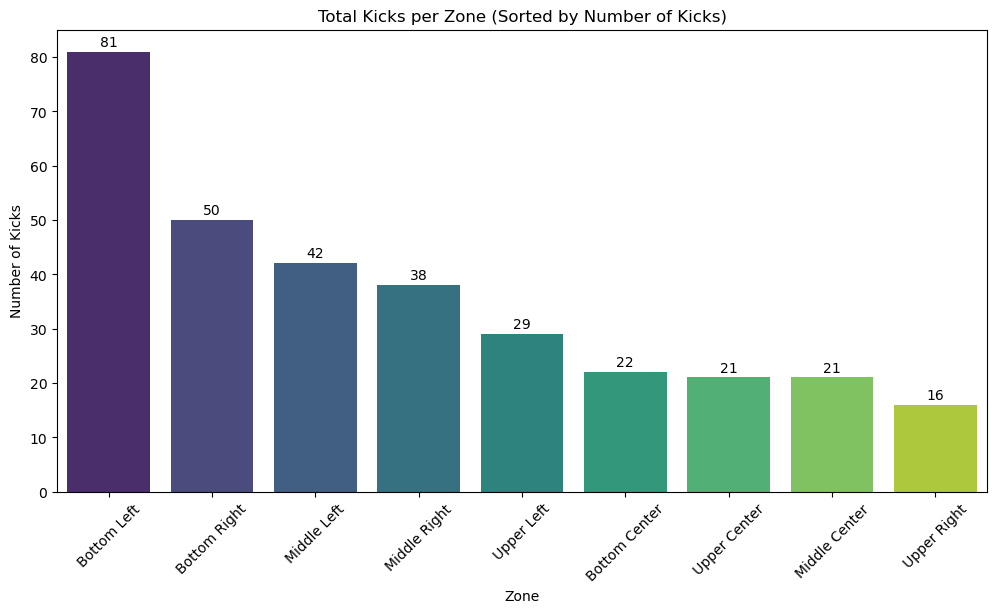

In [1036]:
kicks_per_zone_sorted = kicks_per_zone.sort_values(ascending=False)

# Create a list of sorted zone names based on the sorted index values
zone_labels_sorted = [Zones[zone] for zone in kicks_per_zone_sorted.index]

# Bar Plot for Count of Kicks per Zone (sorted by count)
plt.figure(figsize=(12, 6))
sns.barplot(x=zone_labels_sorted, y=kicks_per_zone_sorted.values, palette="viridis")
plt.title('Total Kicks per Zone (Sorted by Number of Kicks)')
plt.xlabel('Zone')
plt.ylabel('Number of Kicks')
plt.xticks(rotation=45)

# Adding values on top of bars
for index, value in enumerate(kicks_per_zone_sorted.values):
    plt.text(x=index, y=value + 0.5, s=f'{value:.0f}', ha='center', va='bottom')

plt.show()

C:\Users\Yotam\AppData\Local\Temp\ipykernel_26268\3756482182.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_labels, y=total_goals_per_zone.values, palette="viridis")


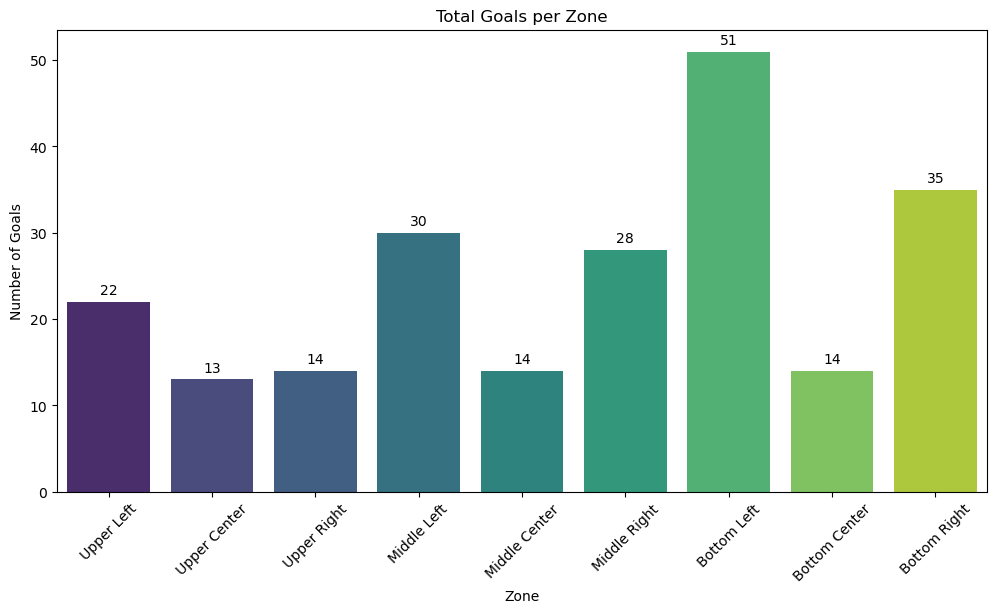

In [1038]:
Zones = {1: 'Upper Left', 2: 'Upper Center', 3: 'Upper Right', 
         4: 'Middle Left', 5: 'Middle Center', 6: 'Middle Right', 
         7: 'Bottom Left', 8: 'Bottom Center', 9: 'Bottom Right'}

# Filter for goals only
goals_df = df[df['Goal'] == 1]

# Calculate total goals per zone
total_goals_per_zone = goals_df['Zone'].value_counts().sort_index()

# Create a list of zone names based on the index values
zone_labels = [Zones[zone] for zone in total_goals_per_zone.index]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=zone_labels, y=total_goals_per_zone.values, palette="viridis")
plt.title('Total Goals per Zone')
plt.xlabel('Zone')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)
for index, value in enumerate(total_goals_per_zone.values):
    plt.text(x=index, y=value + 0.5, s=f'{value:.0f}', ha='center', va='bottom')
plt.show()

In [1040]:
goal_count = df[df['Goal'] == 1].count()['Goal']
miss_count = df[df['Goal'] == 0].count()['Goal']

In [1044]:
print(goal_count)
print(miss_count)

221
99


C:\Users\Yotam\AppData\Local\Temp\ipykernel_26268\210700181.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_counts, x='Outcome', y='Count', palette='viridis')


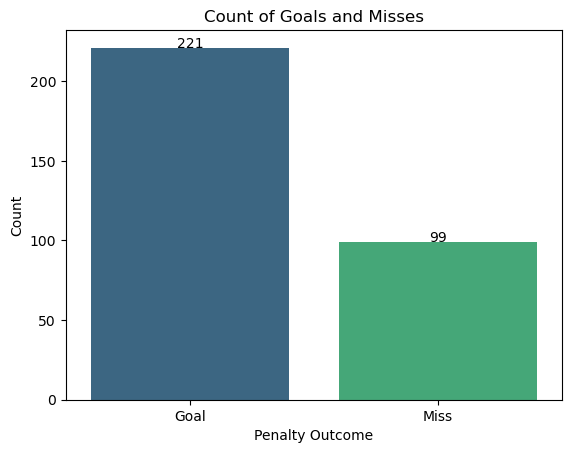

In [1046]:
counts = {'Outcome': ['Goal', 'Miss'], 'Count': [goal_count, miss_count]}

# Create a DataFrame
df_counts = pd.DataFrame(counts)

# Create a bar plot
ax = sns.barplot(data=df_counts, x='Outcome', y='Count', palette='viridis')

# Add labels on top of each bar
for index, row in df_counts.iterrows():
    ax.text(row.name, row['Count'], round(row['Count'], 2), color='black', ha="center")

# Add labels and title
plt.xlabel('Penalty Outcome')
plt.ylabel('Count')
plt.title('Count of Goals and Misses')
plt.show()

In [1052]:
foot_counts = df['Foot'].value_counts()

print("Counts in 'Foot':")
print(foot_counts)

Counts in 'Foot':
Foot
R    256
L     64
Name: count, dtype: int64


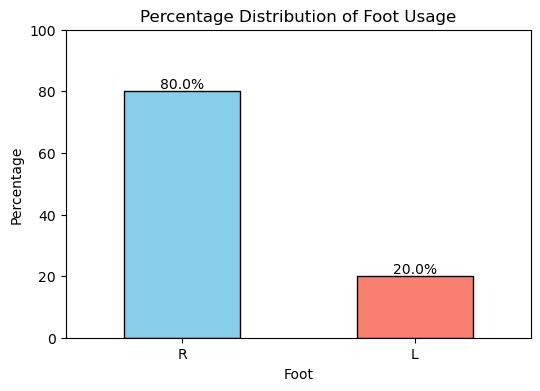

In [1054]:
foot_counts = df['Foot'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
bars = foot_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

plt.title('Percentage Distribution of Foot Usage')
plt.xlabel('Foot')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.ylim(0, 100)

for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.1f}%',
        ha='center',
        va='bottom'
    )

plt.show()

## Data Analysis

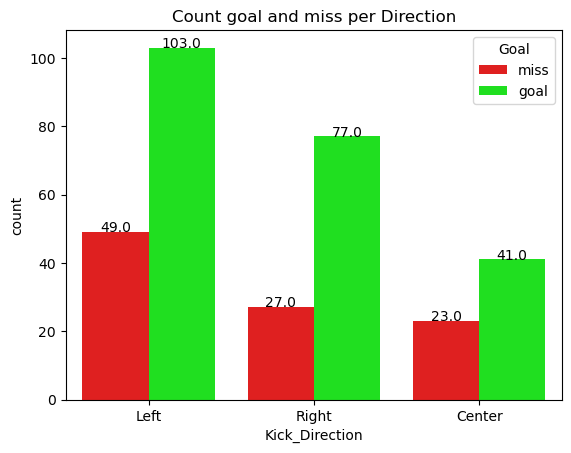

In [1056]:
goal_labels = ['miss', 'goal']
colors = ['red', 'lime']

z = sns.countplot(x='Kick_Direction', data=df, hue='Goal', palette=colors)
plt.title("Count goal and miss per Direction")
plt.xticks(ticks=range(len(df['Kick_Direction'].unique())), labels=df['Kick_Direction'].unique())
plt.legend(title='Goal', labels=goal_labels)
for p in z.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        z.annotate(f'{height}', 
                   (p.get_x() + p.get_width() / 2., height), 
                   ha='center', va='center', 
                   xytext=(0, 3), 
                   textcoords='offset points')

plt.show()

In [1058]:
goal_counts = df.groupby(['Kick_Direction', 'Goal']).size().unstack().fillna(0)
print("Goal Counts:")
print(goal_counts)
total_count = goal_counts.sum(axis=1)
percentages = (goal_counts.div(total_count, axis=0) * 100).fillna(0)
print("Percentages:")
print(percentages)


Goal Counts:
Goal            0.0  1.0
Kick_Direction          
Center           23   41
Left             49  103
Right            27   77
Percentages:
Goal                  0.0        1.0
Kick_Direction                      
Center          35.937500  64.062500
Left            32.236842  67.763158
Right           25.961538  74.038462


<Figure size 1000x600 with 0 Axes>

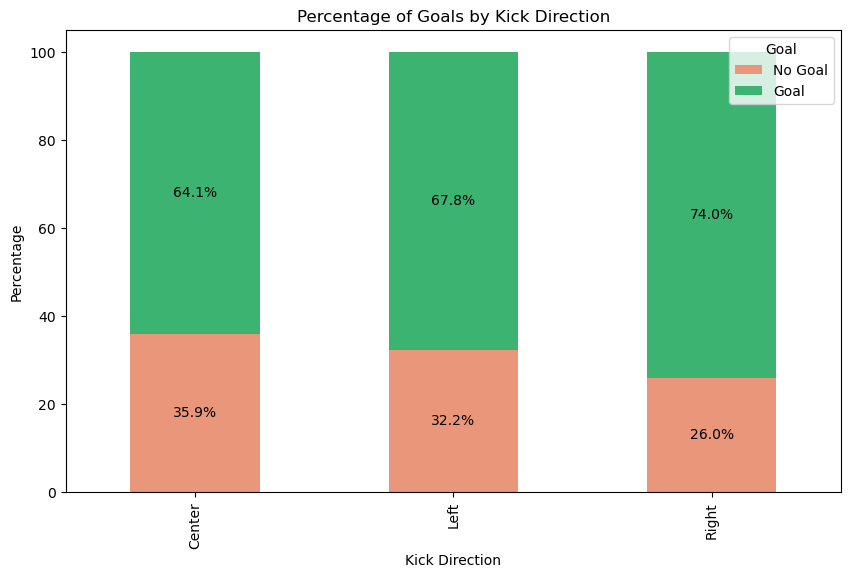

In [1060]:
plt.figure(figsize=(10, 6))

# Plotting the percentage data
percentages.plot(kind='bar', stacked=True, color=['darksalmon', 'mediumseagreen'], figsize=(10, 6))

plt.title('Percentage of Goals by Kick Direction')
plt.xlabel('Kick Direction')
plt.ylabel('Percentage')
plt.legend(title='Goal', labels=['No Goal', 'Goal'], loc='upper right')

# Adding percentage labels on the bars
for i in range(len(percentages)):
    cumulative = 0  # To track the cumulative height of each bar
    for j in range(len(percentages.columns)):
        percentage_k = percentages.iloc[i, j]
        if percentage_k > 0:
            # Calculate the position for the text label
            plt.text(x=i, 
                     y=cumulative + percentage_k / 2,  # Center of the current segment
                     s=f'{percentage_k:.1f}%', ha='center', va='center')
            cumulative += percentage_k  # Update cumulative height for the next segment

plt.show()


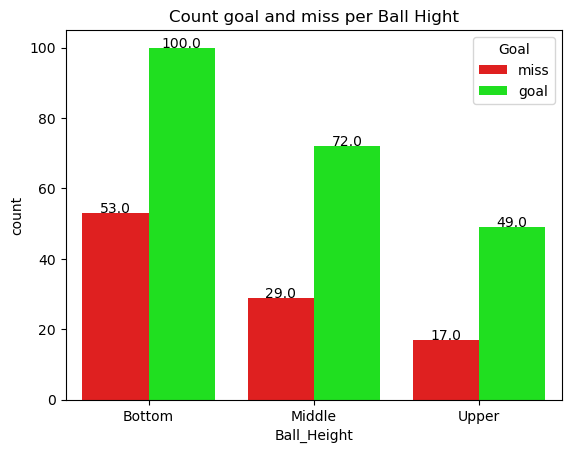

In [1062]:
goal_labels = ['miss', 'goal']
colors = ['red', 'lime']

y = sns.countplot(x='Ball_Height', data=df, hue='Goal', palette=colors)
plt.title("Count goal and miss per Ball Hight")
plt.xticks(ticks=range(len(df['Ball_Height'].unique())), labels=df['Ball_Height'].unique())
plt.legend(title='Goal', labels=goal_labels)
for p in y.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        y.annotate(f'{height}', 
                   (p.get_x() + p.get_width() / 2., height), 
                   ha='center', va='center', 
                   xytext=(0, 3), 
                   textcoords='offset points')

plt.show()

In [1064]:
hight_counts = df.groupby(['Ball_Height', 'Goal']).size().unstack().fillna(0)
print("Goal Counts:")
print(hight_counts)
total_counts = hight_counts.sum(axis=1)

percentages_h = (hight_counts.div(total_counts, axis=0) * 100).fillna(0)
print("Percentages:")
print(percentages_h)

Goal Counts:
Goal         0.0  1.0
Ball_Height          
Bottom        53  100
Middle        29   72
Upper         17   49
Percentages:
Goal               0.0        1.0
Ball_Height                      
Bottom       34.640523  65.359477
Middle       28.712871  71.287129
Upper        25.757576  74.242424


<Figure size 1000x600 with 0 Axes>

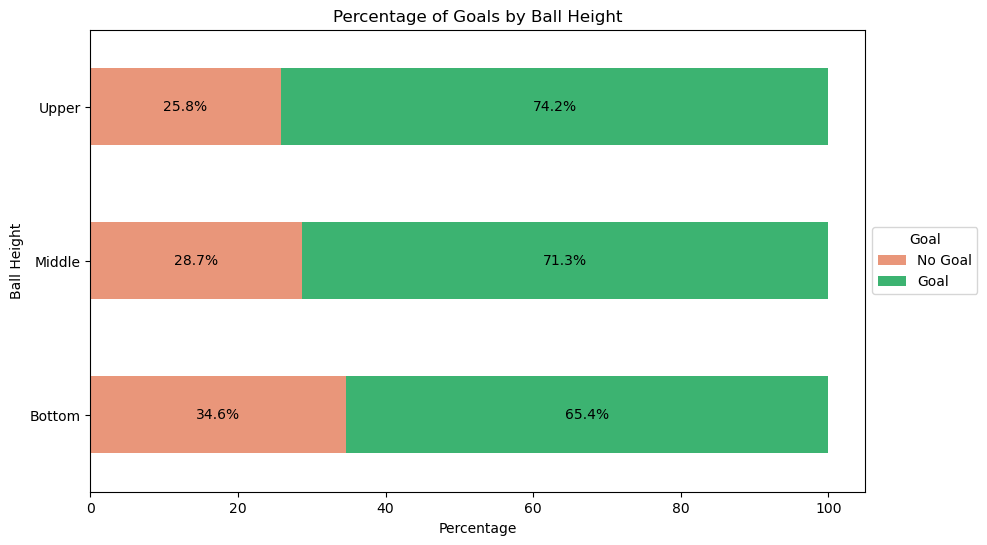

In [1068]:
# Plot the percentages as a horizontal stacked bar graph
plt.figure(figsize=(10, 6))

# Plotting the percentage data
percentages_h.plot(kind='barh', stacked=True, color=['darksalmon', 'mediumseagreen'], figsize=(10, 6))

plt.title('Percentage of Goals by Ball Height')
plt.xlabel('Percentage')
plt.ylabel('Ball Height')
plt.legend(title='Goal', labels=['No Goal', 'Goal'], loc='center left', bbox_to_anchor=(1, 0.5))

# Adding percentage labels on the bars
for i in range(len(percentages_h)):
    cumulative = 0  # To track the cumulative width of each bar
    for j in range(len(percentages_h.columns)):
        percentage = percentages_h.iloc[i, j]
        if percentage > 0:
            # Calculate the position for the text label
            plt.text(x=cumulative + percentage / 2,  # Center of the current segment
                     y=i, s=f'{percentage:.1f}%', ha='center', va='center')
            cumulative += percentage  # Update cumulative width for the next segment

plt.show()



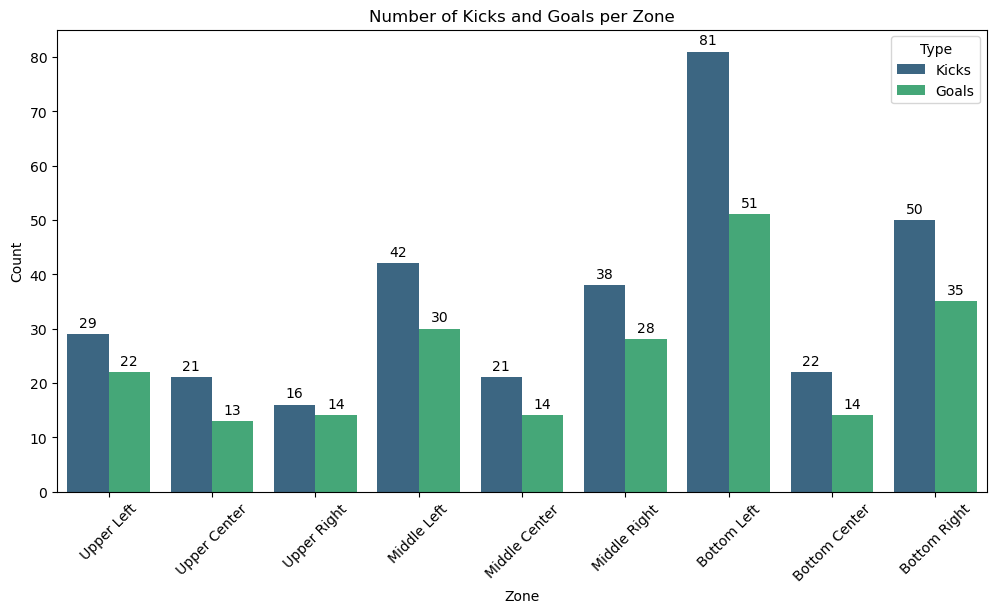

In [1070]:
# Count number of kicks per zone
kicks_per_zone = df['Zone'].value_counts().sort_index()

# Count number of goals per zone
goals_per_zone = df[df['Goal'] == 1]['Zone'].value_counts().sort_index()

# Define the Zones dictionary
Zones = {1: 'Upper Left', 2: 'Upper Center', 3: 'Upper Right', 
         4: 'Middle Left', 5: 'Middle Center', 6: 'Middle Right', 
         7: 'Bottom Left', 8: 'Bottom Center', 9: 'Bottom Right'}

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Zone': [Zones[zone] for zone in kicks_per_zone.index],
    'Kicks': kicks_per_zone.values,
    'Goals': goals_per_zone.reindex(kicks_per_zone.index, fill_value=0).values
})

# Melt the DataFrame to have a long format suitable for seaborn
plot_data_melted = plot_data.melt(id_vars='Zone', value_vars=['Kicks', 'Goals'], var_name='Type', value_name='Count')

# Plot the data
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Zone', y='Count', hue='Type', data=plot_data_melted, palette='viridis')
plt.title('Number of Kicks and Goals per Zone')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')

# Add text labels on top of the bars
for p in ax.patches:
    if p.get_height() > 0:  # Check if the height is greater than 0
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', xytext=(0, 3), 
                    textcoords='offset points')

plt.show()

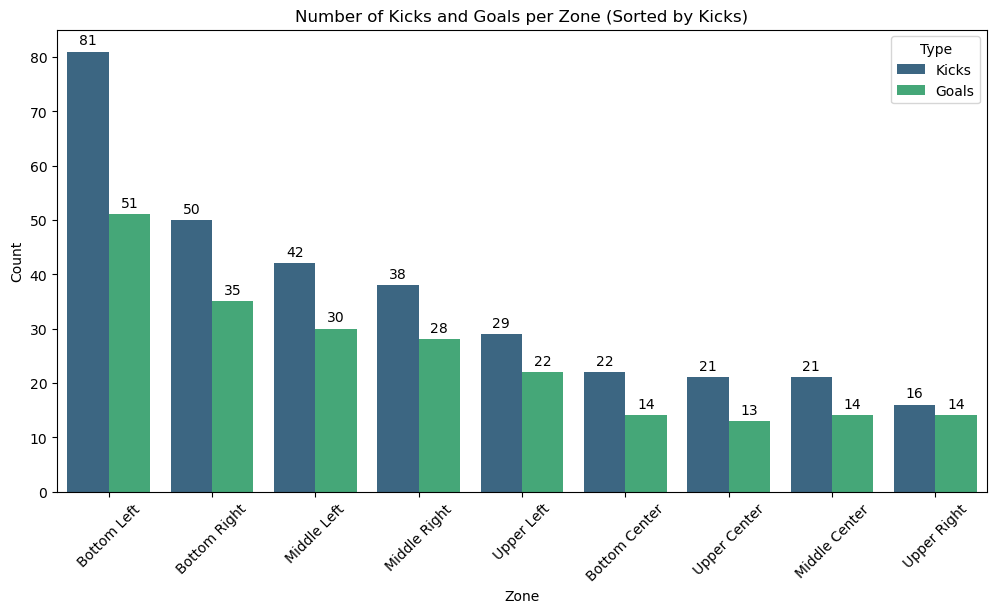

In [900]:
# Sort the DataFrame by the 'Kicks' column in descending order
plot_data_sorted = plot_data.sort_values(by='Kicks', ascending=False)

# Melt the sorted DataFrame for plotting
plot_data_melted_sorted = plot_data_sorted.melt(id_vars='Zone', value_vars=['Kicks', 'Goals'], var_name='Type', value_name='Count')

# Plot the data
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Zone', y='Count', hue='Type', data=plot_data_melted_sorted, palette='viridis')
plt.title('Number of Kicks and Goals per Zone (Sorted by Kicks)')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')

# Add text labels on top of the bars
for p in ax.patches:
    if p.get_height() > 0:  # Check if the height is greater than 0
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', xytext=(0, 3), 
                    textcoords='offset points')

plt.show()


In [1072]:
# Group by 'Zone' to calculate total goals and total records per zone
total_goals_per_zone = df.groupby('Zone')['Goal'].sum()
total_records_per_zone = df.groupby('Zone').size()

# Calculate the percentage of goals per zone
percentage_goals_per_zone = (total_goals_per_zone / total_records_per_zone) * 100

# Convert to DataFrame for better visualization
percentage_goals_per_zone_df = percentage_goals_per_zone.reset_index(name='Percentage_Goals')

# Map zone numbers to descriptive names using the Zones dictionary
percentage_goals_per_zone_df['Zone Name'] = percentage_goals_per_zone_df['Zone'].map(Zones)

print(percentage_goals_per_zone_df)


   Zone  Percentage_Goals      Zone Name
0   1.0         75.862069     Upper Left
1   2.0         61.904762   Upper Center
2   3.0         87.500000    Upper Right
3   4.0         71.428571    Middle Left
4   5.0         66.666667  Middle Center
5   6.0         73.684211   Middle Right
6   7.0         62.962963    Bottom Left
7   8.0         63.636364  Bottom Center
8   9.0         70.000000   Bottom Right


C:\Users\Yotam\AppData\Local\Temp\ipykernel_26268\4243764583.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='Zone', x='Goal_Percentage', data=plot_data_sorted_by_percentage, palette='rocket_r')


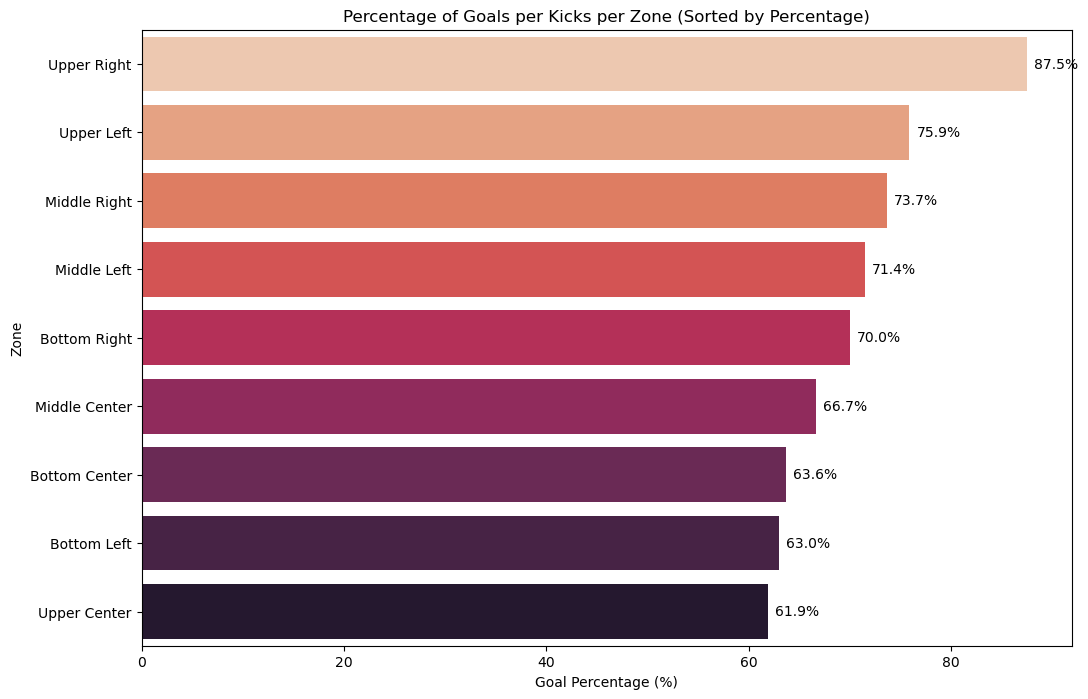

In [1074]:
# Calculate the percentage of goals per zone
plot_data['Goal_Percentage'] = (plot_data['Goals'] / plot_data['Kicks']) * 100

# Sort the DataFrame by 'Goal_Percentage' in descending order
plot_data_sorted_by_percentage = plot_data.sort_values(by='Goal_Percentage', ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))
ax = sns.barplot(y='Zone', x='Goal_Percentage', data=plot_data_sorted_by_percentage, palette='rocket_r')
plt.title('Percentage of Goals per Kicks per Zone (Sorted by Percentage)')
plt.ylabel('Zone')
plt.xlabel('Goal Percentage (%)')

# Add percentage labels on the bars
for p in ax.patches:
    if p.get_width() > 0:  # Check if the width is greater than 0
        ax.annotate(f'{p.get_width():.1f}%', 
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    ha='left', va='center', 
                    fontsize=10, color='black', xytext=(5, 0), 
                    textcoords='offset points')

plt.show()



In [1076]:
df_on_target = df[df["OnTarget"] == 1]

# Calculate the total number of goals and on-target kicks per zone
total_goals_per_zone = df_on_target.groupby('Zone')['Goal'].sum()
total_on_target_per_zone = df_on_target.groupby('Zone').size()

# Calculate the percentage of goals per zone for on-target kicks
percentage_goals_per_zone = (total_goals_per_zone / total_on_target_per_zone) * 100

# Convert to DataFrame for better visualization
percentage_goals_per_zone_df = percentage_goals_per_zone.reset_index(name='Percentage_Goals')

# Map zone numbers to descriptive names using the Zones dictionary
Zones = {1: 'Upper Left', 2: 'Upper Center', 3: 'Upper Right', 
         4: 'Middle Left', 5: 'Middle Center', 6: 'Middle Right', 
         7: 'Bottom Left', 8: 'Bottom Center', 9: 'Bottom Right'}

percentage_goals_per_zone_df['Zone Name'] = percentage_goals_per_zone_df['Zone'].map(Zones)

print(percentage_goals_per_zone_df)

   Zone  Percentage_Goals      Zone Name
0   1.0         95.652174     Upper Left
1   2.0         92.857143   Upper Center
2   3.0        100.000000    Upper Right
3   4.0         75.000000    Middle Left
4   5.0         66.666667  Middle Center
5   6.0         75.675676   Middle Right
6   7.0         69.863014    Bottom Left
7   8.0         63.636364  Bottom Center
8   9.0         72.916667   Bottom Right


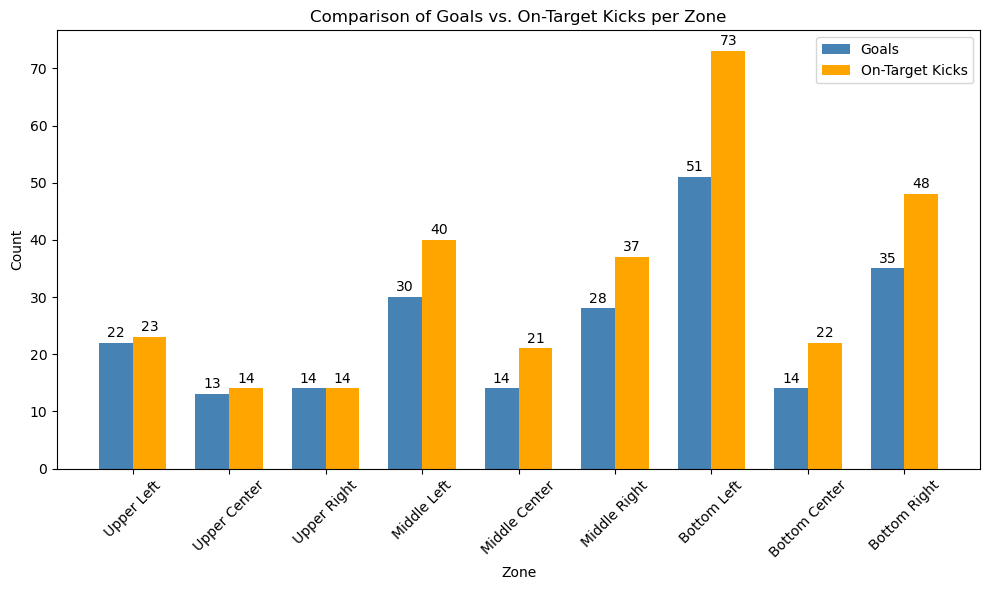

In [1078]:

zones = percentage_goals_per_zone_df['Zone Name']
goals_per_zone = total_goals_per_zone.reindex(percentage_goals_per_zone_df['Zone']).values
on_target_per_zone = total_on_target_per_zone.reindex(percentage_goals_per_zone_df['Zone']).values

# Define the positions for the bars
x = np.arange(len(zones))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, goals_per_zone, width, label='Goals', color='steelblue')
bars2 = ax.bar(x + width/2, on_target_per_zone, width, label='On-Target Kicks', color='orange')

# Add titles and labels
ax.set_xlabel('Zone')
ax.set_ylabel('Count')
ax.set_title('Comparison of Goals vs. On-Target Kicks per Zone')
ax.set_xticks(x)
ax.set_xticklabels(zones)
plt.xticks(rotation=45)
ax.legend()

# Display the values on the bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


C:\Users\Yotam\AppData\Local\Temp\ipykernel_26268\2321423447.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  on = sns.barplot(x='Percentage_Goals', y='Zone Name', data=percentage_goals_per_zone_df, palette='rocket_r')


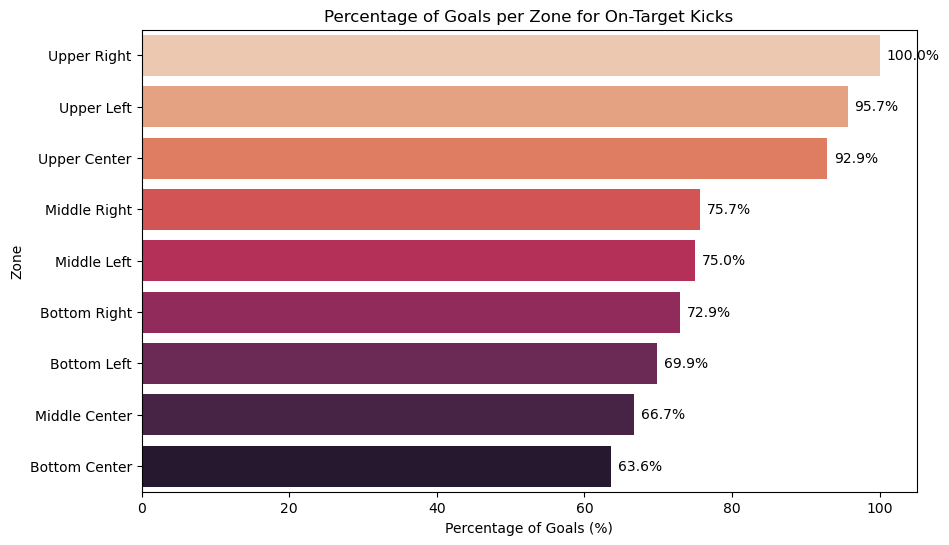

In [1080]:
# Sort the data for better visualization
percentage_goals_per_zone_df = percentage_goals_per_zone_df.sort_values(by='Percentage_Goals', ascending=False)

# Set the style and size of the plot
plt.figure(figsize=(10, 6))
on = sns.barplot(x='Percentage_Goals', y='Zone Name', data=percentage_goals_per_zone_df, palette='rocket_r')

# Add titles and labels
plt.title('Percentage of Goals per Zone for On-Target Kicks')
plt.xlabel('Percentage of Goals (%)')
plt.ylabel('Zone')
for t in on.patches:
    if t.get_width() > 0:  # Check if the width is greater than 0
        on.annotate(f'{t.get_width():.1f}%', 
                    (t.get_width(), t.get_y() + t.get_height() / 2.), 
                    ha='left', va='center', 
                    fontsize=10, color='black', xytext=(5, 0), 
                    textcoords='offset points')

# Show the plot
plt.show()

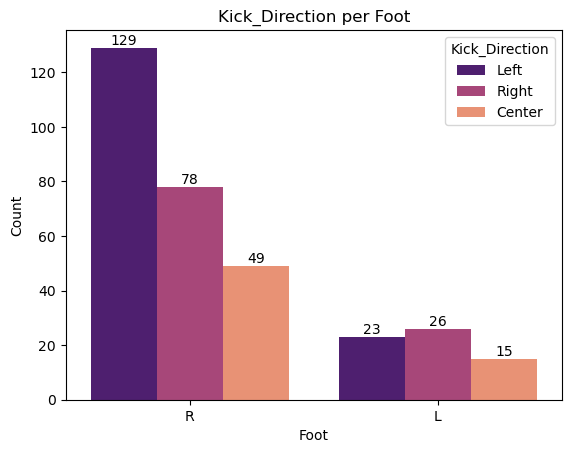

In [1086]:

# Create the count plot
foot_count = sns.countplot(x='Foot', hue='Kick_Direction', data=df, palette='magma')

# Add labels to each bar
for f in foot_count.patches:
    if f.get_width() > 0:
        height = f.get_height()
        foot_count.text(f.get_x() + f.get_width() / 2, height, f'{int(height)}', 
                ha='center', va='bottom')

# Customize the plot
plt.xlabel('Foot')
plt.ylabel('Count')
plt.title('Kick_Direction per Foot')
plt.legend(title='Kick_Direction')
plt.show()

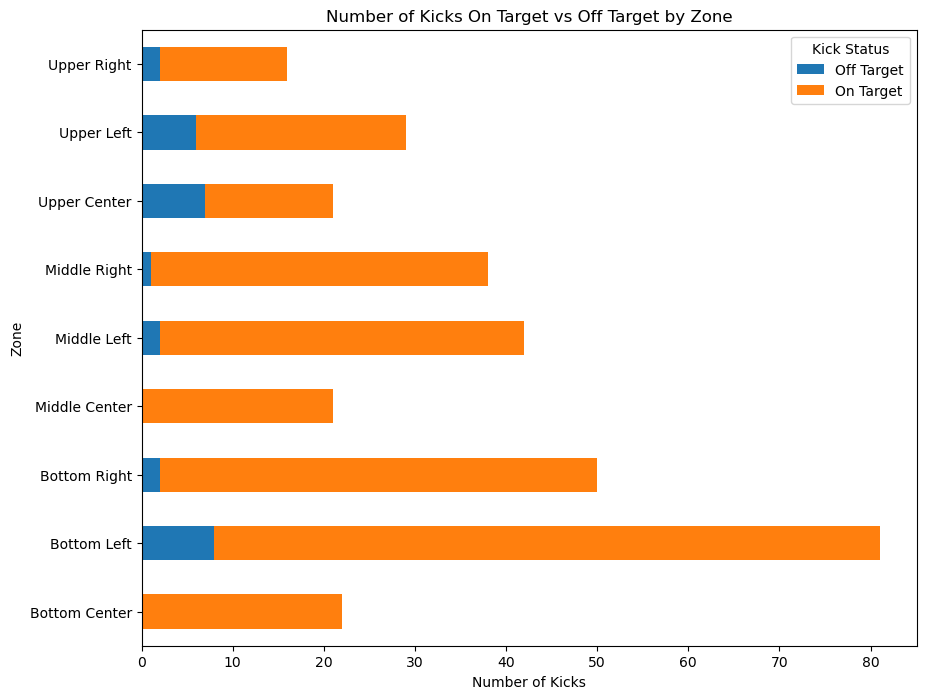

In [918]:
zones_dict_5 = {
    1: 'Upper Left', 2: 'Upper Center', 3: 'Upper Right',
    4: 'Middle Left', 5: 'Middle Center', 6: 'Middle Right',
    7: 'Bottom Left', 8: 'Bottom Center', 9: 'Bottom Right'
}

# Map the zone numbers to their names
df['Zone_Name'] = df['Zone'].map(zones_dict_5)

# Count the number of kicks on target and off target for each zone
zone_counts = df.groupby(['Zone_Name', 'OnTarget']).size().reset_index(name='Count')

# Pivot the data for plotting
zone_pivot = zone_counts.pivot(index='Zone_Name', columns='OnTarget', values='Count').fillna(0)
zone_pivot.columns = ['Off Target', 'On Target']  # Rename columns for clarity

# Plotting
zone_pivot.plot(kind='barh', stacked=True, figsize=(10, 8))

# Adding labels and title
plt.xlabel('Number of Kicks')
plt.ylabel('Zone')
plt.title('Number of Kicks On Target vs Off Target by Zone')
plt.legend(title='Kick Status')
plt.show()

In [1088]:
elimination_data = df[df['Elimination'] == 1]
total_goals_elimination = elimination_data['Goal'].sum()
total_kicks_elimination = elimination_data['Goal'].count()

# Calculate values for Non-Elimination kicks
non_elimination_data = df[df['Elimination'] == 0]
total_goals_non_elimination = non_elimination_data['Goal'].sum()
total_kicks_non_elimination = non_elimination_data['Goal'].count()

# Print results
print("Elimination Penalty Kicks:")
print(f"Total Goals: {total_goals_elimination}")
print(f"Total Kicks: {total_kicks_elimination}")
print(f"Percentage of Goals Scored: {(total_goals_elimination / total_kicks_elimination) * 100:.2f}%")

print("\nNon-Elimination Penalty Kicks:")
print(f"Total Goals: {total_goals_non_elimination}")
print(f"Total Kicks: {total_kicks_non_elimination}")
print(f"Percentage of Goals Scored: {(total_goals_non_elimination / total_kicks_non_elimination) * 100:.2f}%")

Elimination Penalty Kicks:
Total Goals: 31.0
Total Kicks: 46
Percentage of Goals Scored: 67.39%

Non-Elimination Penalty Kicks:
Total Goals: 190.0
Total Kicks: 274
Percentage of Goals Scored: 69.34%


C:\Users\Yotam\AppData\Local\Temp\ipykernel_26268\2320350422.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Total Goals', data=plot_data, palette='viridis')


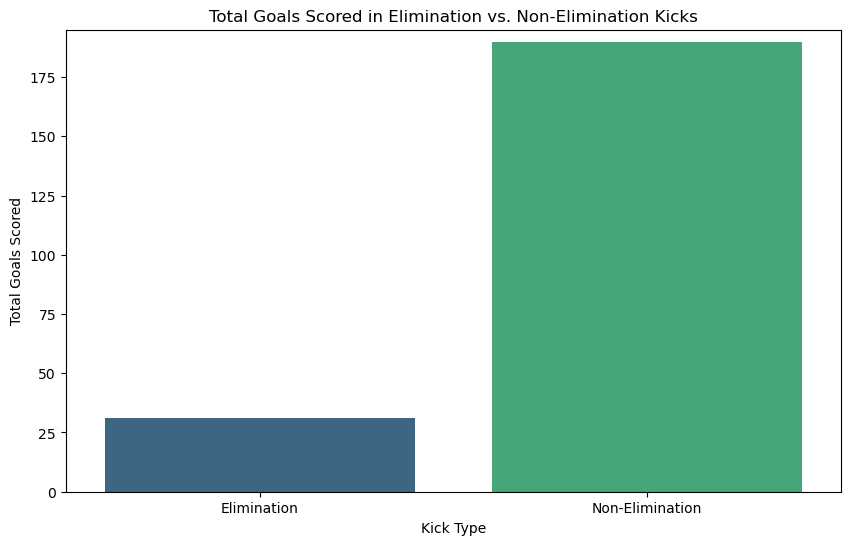

In [1090]:
goals_elimination = df[df['Elimination'] == 1]['Goal'].sum()
goals_non_elimination = df[df['Elimination'] == 0]['Goal'].sum()

# Prepare data for plotting
plot_data = pd.DataFrame({
    'Category': ['Elimination', 'Non-Elimination'],
    'Total Goals': [goals_elimination, goals_non_elimination]
})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total Goals', data=plot_data, palette='viridis')
plt.title('Total Goals Scored in Elimination vs. Non-Elimination Kicks')
plt.ylabel('Total Goals Scored')
plt.xlabel('Kick Type')
plt.ylim(0, plot_data['Total Goals'].max() + 5)  # Adjust y-axis limit for better visualization
plt.show()

C:\Users\Yotam\AppData\Local\Temp\ipykernel_26268\1970884754.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Category', y='Percentage', data=plot_data, palette='rocket')


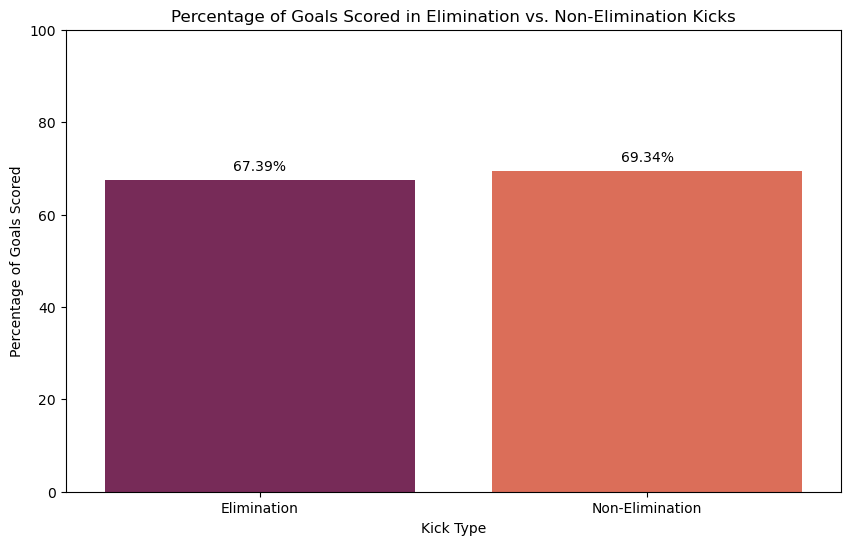

In [1092]:
total_goals_elimination = df[df["Elimination"] == 1]['Goal'].sum()
total_kicks_elimination = df[df["Elimination"] == 1]['Goal'].count()
percentage_goals_elimination = (total_goals_elimination / total_kicks_elimination) * 100

total_goals_non_elimination = df[df['Elimination'] == 0]['Goal'].sum()
total_kicks_non_elimination = df[df['Elimination'] == 0]['Goal'].count()
percentage_goals_non_elimination = (total_goals_non_elimination / total_kicks_non_elimination) * 100

# Prepare data for plotting
plot_data = pd.DataFrame({
    'Category': ['Elimination', 'Non-Elimination'],
    'Percentage': [percentage_goals_elimination, percentage_goals_non_elimination]
})

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Category', y='Percentage', data=plot_data, palette='rocket')
plt.title('Percentage of Goals Scored in Elimination vs. Non-Elimination Kicks')
plt.ylabel('Percentage of Goals Scored')
plt.xlabel('Kick Type')
plt.ylim(0, 100)

for e in bar_plot.patches:
    height = e.get_height()
    bar_plot.annotate(f'{height:.2f}%', 
                      (e.get_x() + e.get_width() / 2., height), 
                      ha='center', va='center',
                      xytext=(0, 10), 
                      textcoords='offset points')

plt.show()

In [1094]:
elimination_goals = df[df['Elimination'] == 1]['Goal']
non_elimination_goals = df[df['Elimination'] == 0]['Goal']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(elimination_goals, non_elimination_goals, equal_var=False)

# Print results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Expect the hypothesis: There is a significant difference between the two means.")
else:
    print("Reject the hypothesis: There is no significant difference between the two means.")

T-statistic: -0.26
P-value: 0.7962
Reject the hypothesis: There is no significant difference between the two means.


<Figure size 1200x600 with 0 Axes>

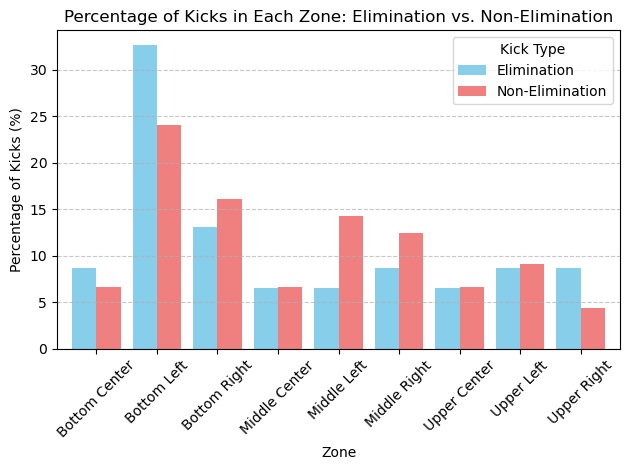

In [1096]:

elimination_kicks = df[df['Elimination'] == 1]
non_elimination_kicks = df[df['Elimination'] == 0]

# Calculate the number of kicks in each zone for both elimination and non-elimination kicks
elimination_zone_counts = elimination_kicks['Zone'].value_counts()
non_elimination_zone_counts = non_elimination_kicks['Zone'].value_counts()

# Calculate the percentages for each zone
elimination_zone_percentages = (elimination_zone_counts / elimination_zone_counts.sum()) * 100
non_elimination_zone_percentages = (non_elimination_zone_counts / non_elimination_zone_counts.sum()) * 100

# Dictionary to map zones to descriptive names
zones_dict = {1: 'Upper Left', 2: 'Upper Center', 3: 'Upper Right', 
              4: 'Middle Left', 5: 'Middle Center', 6: 'Middle Right', 
              7: 'Bottom Left', 8: 'Bottom Center', 9: 'Bottom Right'}

# Map the zone numbers to descriptive names
elimination_zone_percentages.index = elimination_zone_percentages.index.map(zones_dict)
non_elimination_zone_percentages.index = non_elimination_zone_percentages.index.map(zones_dict)

# Sort the indices to ensure consistent order across both series
elimination_zone_percentages = elimination_zone_percentages.sort_index()
non_elimination_zone_percentages = non_elimination_zone_percentages.sort_index()

# Create a DataFrame to hold both percentages
data = pd.DataFrame({
    'Elimination': elimination_zone_percentages,
    'Non-Elimination': non_elimination_zone_percentages
})

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))
data.plot(kind='bar', color=['skyblue', 'lightcoral'], width=0.8)
plt.xlabel('Zone')
plt.ylabel('Percentage of Kicks (%)')
plt.title('Percentage of Kicks in Each Zone: Elimination vs. Non-Elimination')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Kick Type')
plt.tight_layout()
plt.show()


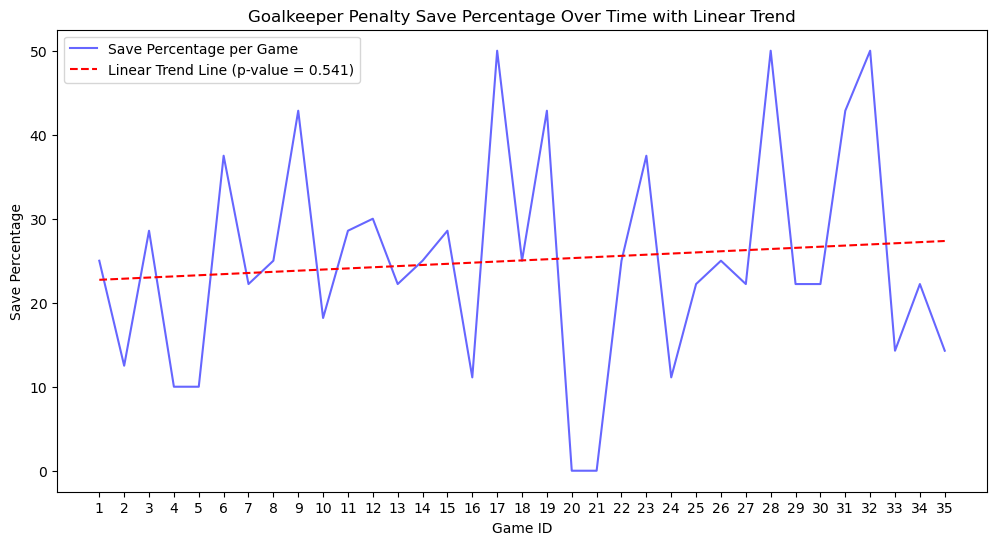

Slope: 0.1359
Intercept: 22.5907
R-squared: 0.0114
P-value: 0.5413


In [1098]:
# Sort data by Game ID to maintain chronological order
df = df.sort_values('Game_id')

# Calculate whether the goalkeeper saved the penalty (1 if saved, 0 if not)
df['Saved'] = df.apply(lambda row: 1 if row['Goal'] == 0 and row['OnTarget'] == 1 else 0, axis=1)

# Group by Game ID and calculate save percentage for each game
game_stats = df.groupby('Game_id').agg(
    Total_Penalties_Faced=('OnTarget', 'sum'),
    Saves=('Saved', 'sum')
)
game_stats['Save_Percentage'] = (game_stats['Saves'] / game_stats['Total_Penalties_Faced']) * 100

# Prepare data for linear regression
X = game_stats.index  # Game IDs as the time variable
y = game_stats['Save_Percentage']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(X, y)

# Plot the save percentage and the fitted line
plt.figure(figsize=(12, 6))
plt.plot(X, y, label='Save Percentage per Game', color='b', alpha=0.6)
plt.plot(X, intercept + slope * X, label=f'Linear Trend Line (p-value = {p_value:.3f})', color='r', linestyle='--')
plt.xlabel('Game ID')
plt.xticks(X)
plt.ylabel('Save Percentage')
plt.title('Goalkeeper Penalty Save Percentage Over Time with Linear Trend')
plt.legend()
plt.show()

# Output the results of the regression analysis
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")


In [1100]:
df.head(10)

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination,Kick_Direction,Ball_Height,Saved
0,1,FRA,7.0,R,R,1.0,1.0,1,0.0,Left,Bottom,0
1,1,GER,9.0,R,C,1.0,1.0,2,0.0,Right,Bottom,0
2,1,FRA,6.0,R,L,1.0,1.0,3,0.0,Right,Middle,0
3,1,GER,2.0,R,C,1.0,1.0,4,0.0,Center,Upper,0
4,1,FRA,9.0,R,L,1.0,1.0,5,0.0,Right,Bottom,0
5,1,GER,4.0,R,L,1.0,0.0,6,0.0,Left,Middle,1
6,1,FRA,8.0,L,L,1.0,0.0,7,0.0,Center,Bottom,1
7,1,GER,3.0,R,R,1.0,1.0,8,0.0,Right,Upper,0
8,1,FRA,9.0,R,L,1.0,1.0,9,0.0,Right,Bottom,0
9,1,GER,9.0,R,C,1.0,1.0,10,1.0,Right,Bottom,0


In [1102]:
sorted_game_stats = game_stats.sort_values(by='Save_Percentage')

# Get the top 3 games with the highest save percentage
top_3_games = sorted_game_stats.tail(3).index

# Get the bottom 2 games with the lowest save percentage
bottom_2_games = sorted_game_stats.head(2).index

# Find teams for these games in the original DataFrame
top_teams = df[df['Game_id'].isin(top_3_games)][['Game_id', 'Team']].drop_duplicates()
bottom_teams = df[df['Game_id'].isin(bottom_2_games)][['Game_id', 'Team']].drop_duplicates()

# Display the results
print("Teams for the games with the highest save percentages:")
print(top_teams)

print("\nTeams for the games with the lowest save percentages:")
print(bottom_teams)


Teams for the games with the highest save percentages:
     Game_id Team
168       17  UKR
169       17  SWZ
283       28  CRO
282       28  DEN
314       32  MAR
315       32  SPA

Teams for the games with the lowest save percentages:
     Game_id Team
200       20  ITA
201       20  FRA
212       21  PAR
211       21  JAP


In [1104]:
# Group by Game ID and count the number of penalty kicks
penalty_counts = df.groupby('Game_id').size()

# Find the game with the maximum number of penalty kicks
max_penalty_game_id = penalty_counts.idxmax()
max_penalty_count = penalty_counts.max()

# Find teams for this game
teams_max_penalty_game = df[df['Game_id'] == max_penalty_game_id][['Team']].drop_duplicates()

# Display the results
print(f"The game with the most penalty kicks (Game ID {max_penalty_game_id}) had {max_penalty_count} penalty kicks.")
print("Teams involved in this game:")
print(teams_max_penalty_game)


The game with the most penalty kicks (Game ID 1) had 12 penalty kicks.
Teams involved in this game:
  Team
0  FRA
1  GER


In [1106]:
df.to_csv('c:\\Users\\Yotam\\Desktop\\penalty_data.csv', index=False)